In [1]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/58/f7/a966b800b49cb5379e348bf0717df481051714a99ece15289718562f6952/yfinance-0.2.35-py2.py3-none-any.whl.metadata
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     --- --------------------------------- 30.7/314.6 kB 660.6 kB/s eta 0:00:01
     --- --------------------------------- 30.7/314.6 kB 660.6 kB/s eta 0:00:01
     ------- ----------------------------- 61.4/314.6 kB 365.7 kB/s eta 0:00:01
     ------- ----------------------------- 61.4/314.6 kB 365.7 kB/s eta 0:00:01
     ---------- -------------------------- 92.2/314.6 kB 374.1 kB/s eta 0:00:01
     ------------ ----------------------- 112.6/314.6 kB 409.6 kB/s eta 0:00:01
     -------------- --------------------- 122.9/314.6 kB 361.0 kB/s eta 0:00:01
     ---------------- ---

In [3]:
from datetime import date, timedelta

days=100

today = date.today()
end_date = today.strftime("%Y-%m-%d")

start_date = today - timedelta(days=days)
start_date = start_date.strftime("%Y-%m-%d")

In [4]:
import yfinance as yf
import pandas as pd

data = yf.download('BTC-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-29,27024.841797,27225.937500,26721.763672,26911.720703,26911.720703,10396435377
2023-09-30,26911.689453,27091.794922,26888.968750,26967.916016,26967.916016,5331172801
2023-10-01,26967.396484,28047.238281,26965.093750,27983.750000,27983.750000,9503917434
2023-10-02,27976.798828,28494.458984,27347.787109,27530.785156,27530.785156,19793041322
2023-10-03,27508.251953,27667.191406,27216.001953,27429.978516,27429.978516,11407814187
...,...,...,...,...,...,...
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210


In [5]:
data["Date"] = data.index
data.reset_index(drop=True, inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,Date
0,27024.841797,27225.937500,26721.763672,26911.720703,26911.720703,10396435377,2023-09-29
1,26911.689453,27091.794922,26888.968750,26967.916016,26967.916016,5331172801,2023-09-30
2,26967.396484,28047.238281,26965.093750,27983.750000,27983.750000,9503917434,2023-10-01
3,27976.798828,28494.458984,27347.787109,27530.785156,27530.785156,19793041322,2023-10-02
4,27508.251953,27667.191406,27216.001953,27429.978516,27429.978516,11407814187,2023-10-03
...,...,...,...,...,...,...,...
95,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536,2024-01-02
96,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,46342323118,2024-01-03
97,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210,2024-01-04
98,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347,2024-01-05


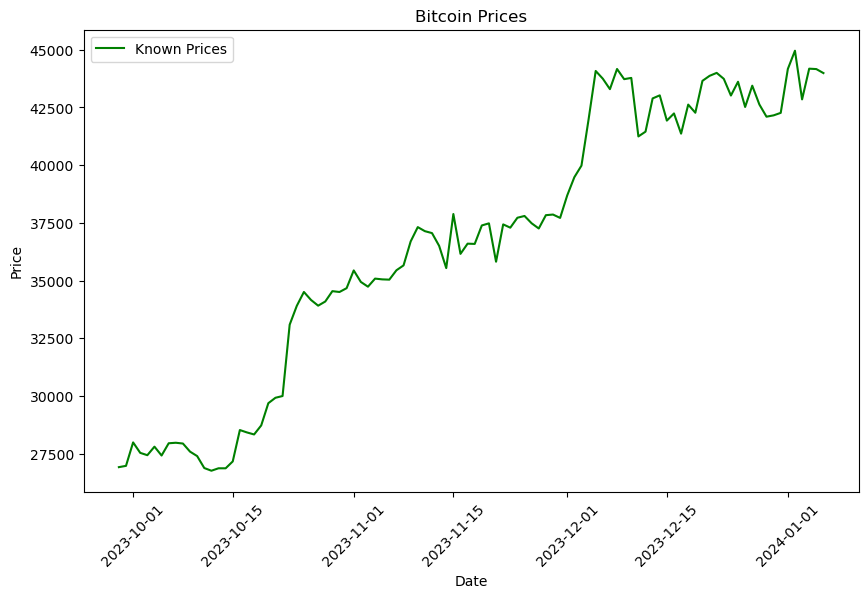

In [6]:
import matplotlib.pyplot as plt

dates = data['Date'] 

prices = data['Adj Close'] 

plt.figure(figsize=(10, 6))

plt.plot(dates, prices, color='green', label='Known Prices')
 
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Prices')

plt.xticks(rotation=45)

plt.legend()

plt.show()

In [7]:
import numpy as np

def create_dataset(serie, window_size=20):
    dataX, dataY = [], []
    for i in range(len(serie)-window_size-1):
        a = serie[i:(i+window_size), 0]  
        dataX.append(a)
        dataY.append([serie[i + window_size, 0]])
    return np.array(dataX), np.array(dataY)

In [8]:
from sklearn.preprocessing import MinMaxScaler

window_size=20

closedf=data[['Adj Close']]
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(closedf)
  
X, y = create_dataset(closedf, window_size)

In [9]:
X

array([[0.00851164, 0.0115991 , 0.06741057, ..., 0.09684366, 0.0911452 ,
        0.08634296],
       [0.0115991 , 0.06741057, 0.04252399, ..., 0.0911452 , 0.08634296,
        0.10785064],
       [0.06741057, 0.04252399, 0.03698552, ..., 0.08634296, 0.10785064,
        0.16076716],
       ...,
       [0.89374331, 0.83362548, 0.8506771 , ..., 0.8520545 , 0.95656121,
        1.        ],
       [0.83362548, 0.8506771 , 0.80257837, ..., 0.95656121, 1.        ,
        0.88408476],
       [0.8506771 , 0.80257837, 0.87174288, ..., 1.        , 0.88408476,
        0.95725292]])

In [10]:
y

array([[0.10785064],
       [0.16076716],
       [0.17370385],
       [0.17785108],
       [0.34774883],
       [0.39254227],
       [0.42557822],
       [0.40655901],
       [0.39299682],
       [0.40287385],
       [0.42753744],
       [0.42555311],
       [0.43464142],
       [0.47691742],
       [0.44950096],
       [0.43818751],
       [0.45740996],
       [0.45560569],
       [0.45494725],
       [0.47726403],
       [0.48889596],
       [0.5459169 ],
       [0.580027  ],
       [0.5703618 ],
       [0.56577246],
       [0.53543573],
       [0.48243282],
       [0.61115759],
       [0.51633883],
       [0.54061826],
       [0.54001497],
       [0.58401455],
       [0.58898182],
       [0.49760613],
       [0.58653048],
       [0.5786893 ],
       [0.60235042],
       [0.60655409],
       [0.58910072],
       [0.57674145],
       [0.6084382 ],
       [0.60994394],
       [0.60193643],
       [0.65555957],
       [0.69883053],
       [0.72641439],
       [0.83639123],
       [0.951

In [11]:
len(y)

79

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [13]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import LSTM

model = Sequential()

model.add(Input(shape=(window_size, 1)))
 
model.add(LSTM(units=32,  dropout=0.1, activation="relu"))

model.add(Dense(1 , activation="relu"))

model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse'])

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=10, batch_size=8)

Epoch 1/10
8/8 [==============================] - 1s 43ms/step - loss: 0.2762 - mse: 0.2762 - val_loss: 0.2553 - val_mse: 0.2553
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 0.1620 - mse: 0.1620 - val_loss: 0.1066 - val_mse: 0.1066
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0395 - mse: 0.0395 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 7/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 8/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0079 - mse: 0.0079 - val_los

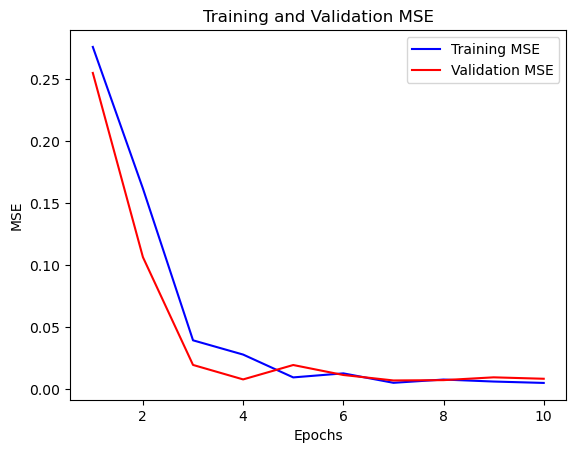

In [15]:
import matplotlib.pyplot as plt

train_mse = history.history['mse']
val_mse = history.history['val_mse']

epochs = range(1, len(train_mse) + 1)

plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [23]:
pred_steps = 10

predicted_prices=[]

X_pred=[X[-1]]

X_pred = np.array(X_pred)

for _ in range(pred_steps):
    
    prediction = model.predict([X_pred])
    
    price=prediction[0]
    
    predicted_prices.append(price)
    
    X_pred = np.append(X_pred, [price], axis=1)
    
    X_pred = X_pred[:, 1:]

predicted_prices = np.array(predicted_prices, dtype=object)
predicted_prices = scaler.inverse_transform(predicted_prices)
print(predicted_prices)

1/1 [==============================] - 0s 15ms/step
[[43336.28893079]
 [43366.17070762]
 [43406.00295123]
 [43430.23036338]
 [43453.39785336]
 [43461.84902391]
 [43464.10773213]
 [43464.29324563]
 [43467.12585235]
 [43490.81842148]]


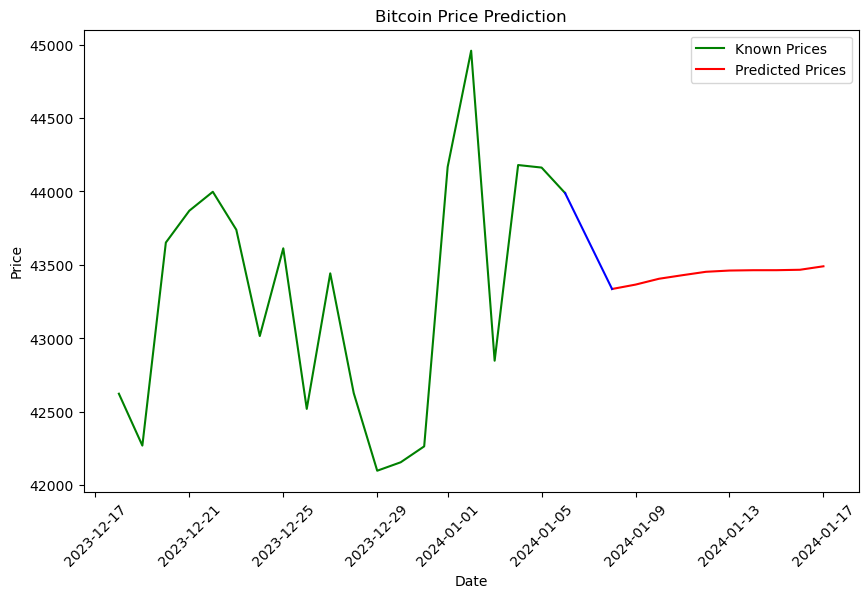

In [25]:
import matplotlib.pyplot as plt
previous_days=20

dates_known = data["Date"].iloc[-previous_days:].values

known_prices = data["Adj Close"].iloc[-previous_days:].values

dates_pred = pd.date_range(start=today + timedelta(days=1), periods=pred_steps).values

plt.figure(figsize=(10, 6))

plt.plot(dates_known, known_prices, color='green', label='Known Prices')

plt.plot(dates_pred, predicted_prices, color='red', label='Predicted Prices')

plt.plot([dates_known[-1], dates_pred[0]], [known_prices[-1], predicted_prices[0][0]], color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction')

plt.xticks(rotation=45)

plt.legend()

plt.show()